## Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
path = kagglehub.dataset_download("somesh24/spambase")

training_df = pd.read_csv(f"{path}/spambase_csv.csv")
target_col = training_df.columns[-1]
print("The Target Column is ",target_col)


The Target Column is  class


## Exploratory Data Analysis

In [ ]:
print("Shape:", training_df.shape)
print(training_df.info())
training_df.describe(include='all')

Shape: (4601, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_repor

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.000000        0.000000          0.000000            0.000000   
75%         0.380000        0.000000          0.000000            0.000000   
max        10.000000        5.880000          7.270000           11.110000   

       word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
count      4601.000000     4601.000000  ...    4601.000000    4601.000000   
mean          0.090067        0.239413  ...       0.038575       0.139030   
std           0.278616        0.644755  ...       0.243471       0.270355   
min           0.000000        0.000000  ...       0.000000       0.000000   
25%           0.000000        0.000000  ...       0.000000       0.000000   
50%           0.000000        0.000000  ...       0.000000       0.065000   
75%           0.000000        0.160000  ...       0.000000       0.188000   
max           5.260000       18.180000  ...       4.385000       9.752000   

       char_freq_%5B  char_freq_%21  char_freq_%24  char_freq_%23  \
count    4601.000000    4601.000000    4601.000000    4601.000000   
mean        0.016976       0.269071       0.075811       0.044238   
std         0.109394       0.815672       0.245882       0.429342   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.315000       0.052000       0.000000   
max         4.081000      32.478000       6.003000      19.829000   

       capital_run_length_average  capital_run_length_longest  \
count                 4601.000000                 4601.000000   
mean                     5.191515                   52.172789   
std                     31.729449                  194.891310   
min                      1.000000                    1.000000   
25%                      1.588000                    6.000000   
50%                      2.276000                   15.000000   
75%                      3.706000                   43.000000   
max                   1102.500000                 9989.000000   

       capital_run_length_total        class  
count               4601.000000  4601.000000  
mean                 283.289285     0.394045  
std                  606.347851     0.488698  
min                    1.000000     0.000000  
25%                   35.000000     0.000000  
50%                   95.000000     0.000000  
75%                  266.000000     1.000000  
max                15841.000000     1.000000  

[8 rows x 58 columns]

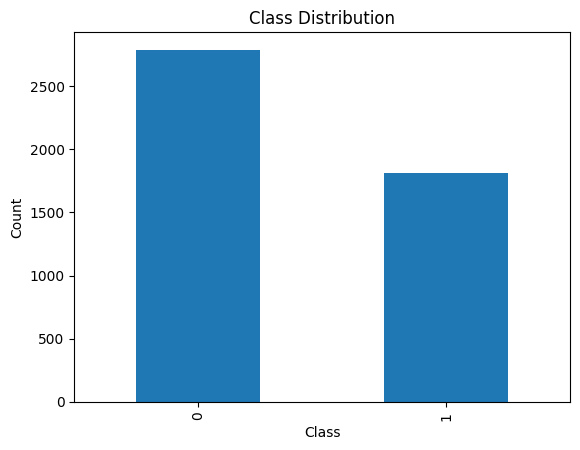

In [ ]:
training_df[target_col].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### Missing Values

In [ ]:
print(f"There are {training_df.isnull().sum().sum()} missing values")


There are 0 missing values


#### Numerical Feature Ananlysis

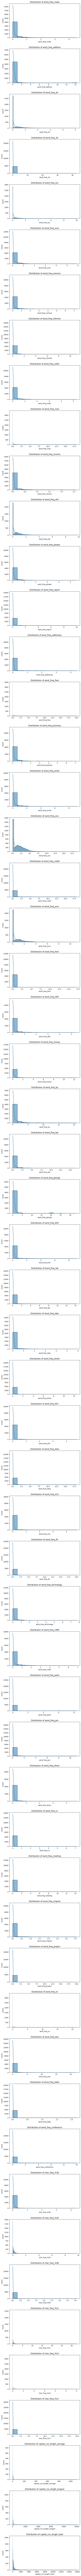

In [ ]:
from scipy.stats import shapiro
num_features = training_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features = [col for col in num_features if col != target_col]

fig, axes = plt.subplots(nrows=len(num_features), ncols=1, figsize=(8, len(num_features)*4))
fig.tight_layout(pad=5.0)
features = {}
for i, column in enumerate(num_features):
    # Plot histogram with KDE
    sns.histplot(training_df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

    # Shapiro-Wilk normality test
    stat, p = shapiro(training_df[column].dropna())

    # Add test result as text on plot
    result = 1 if p > 0.05 else 0
    features[column]=result

plt.show()

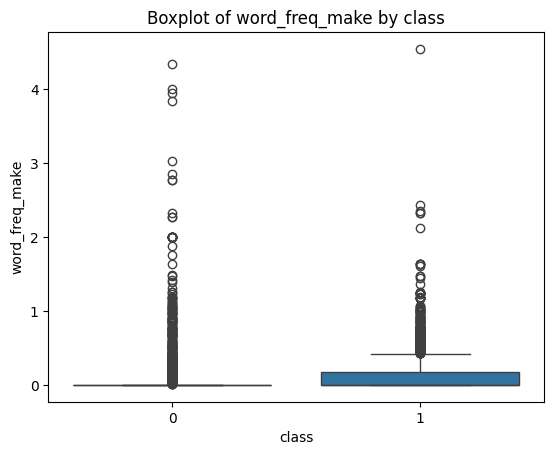

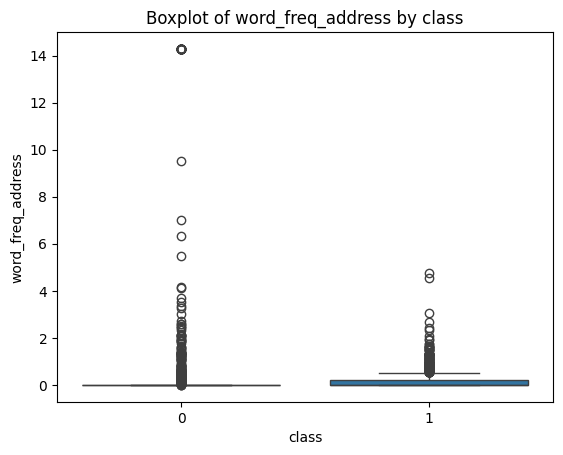

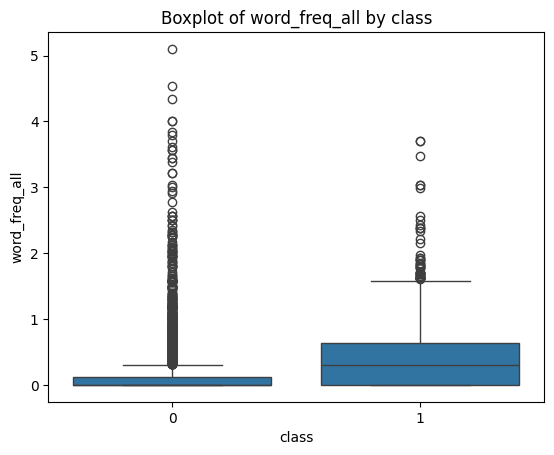

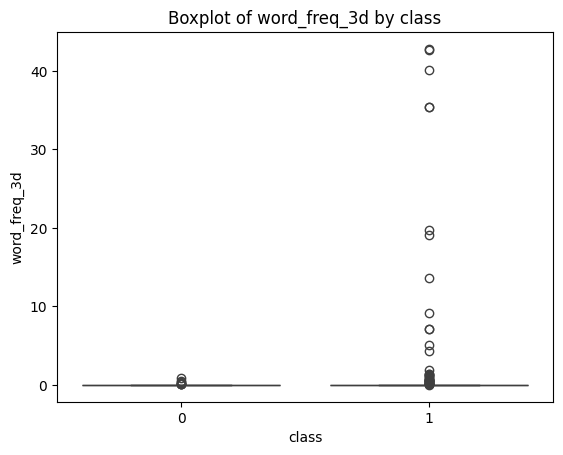

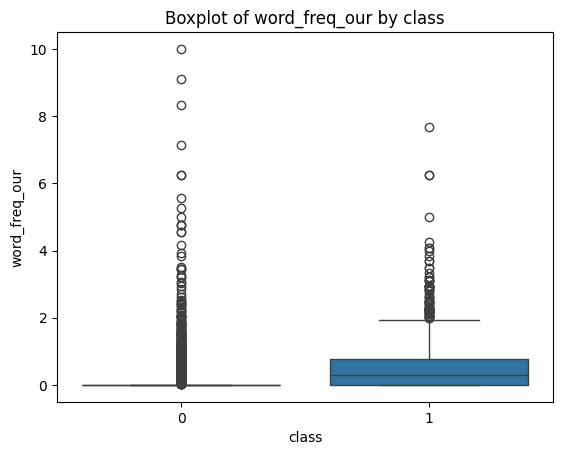

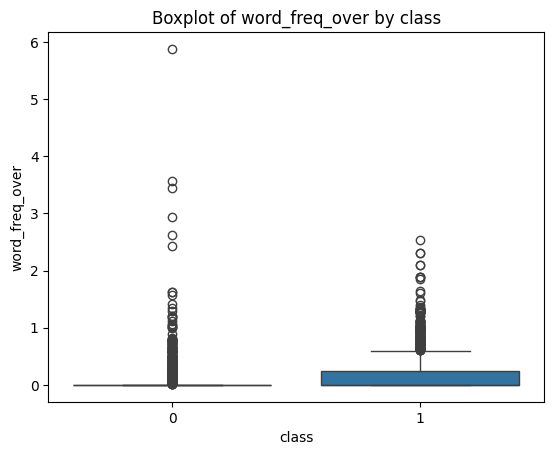

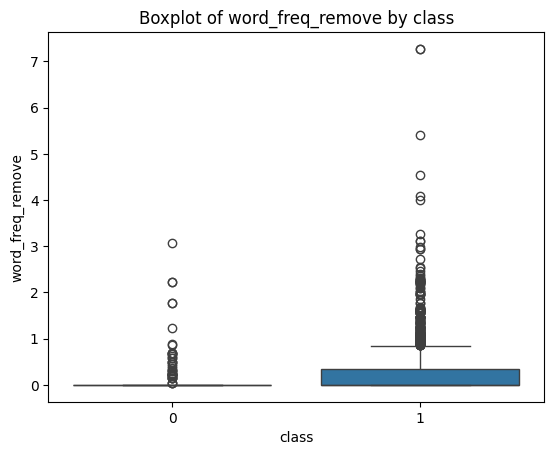

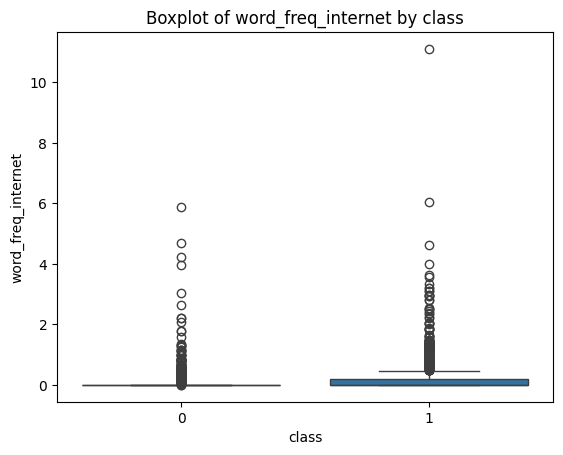

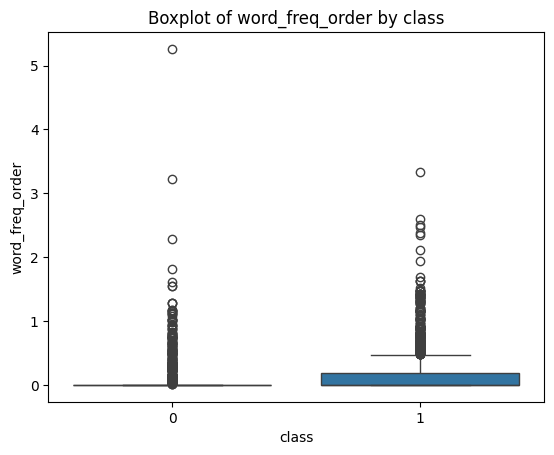

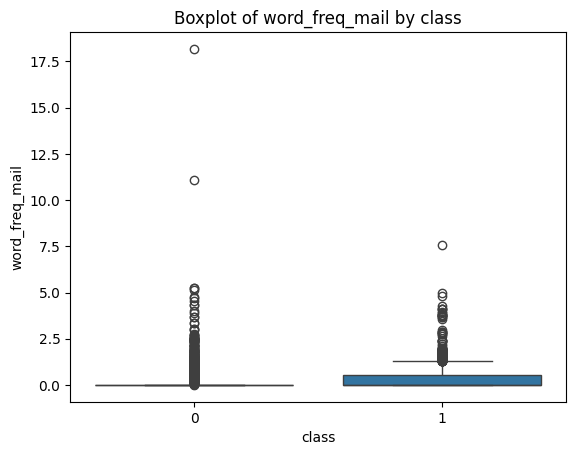

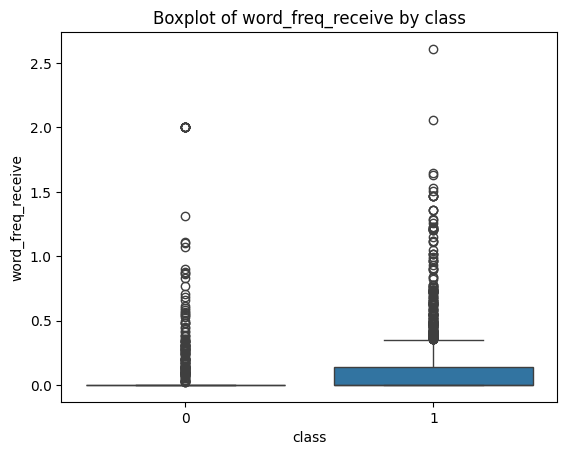

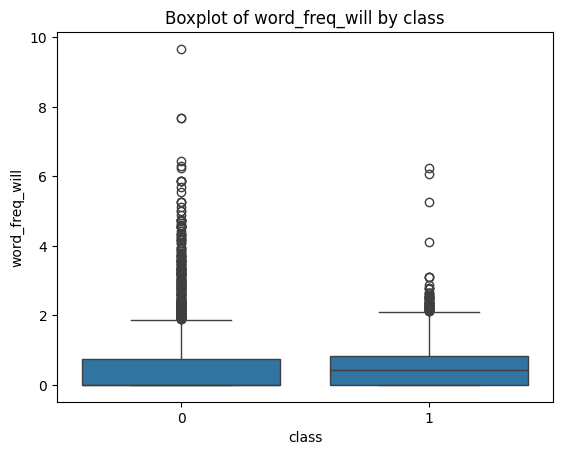

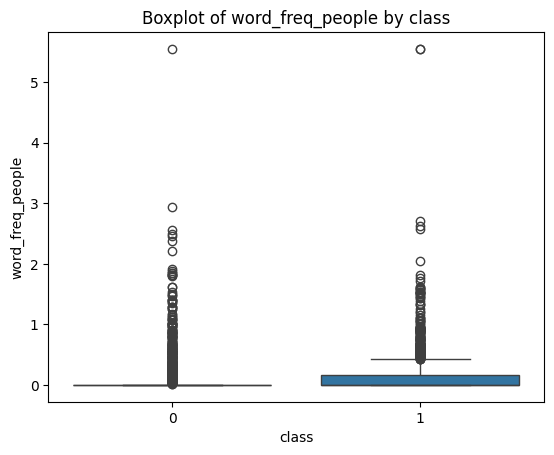

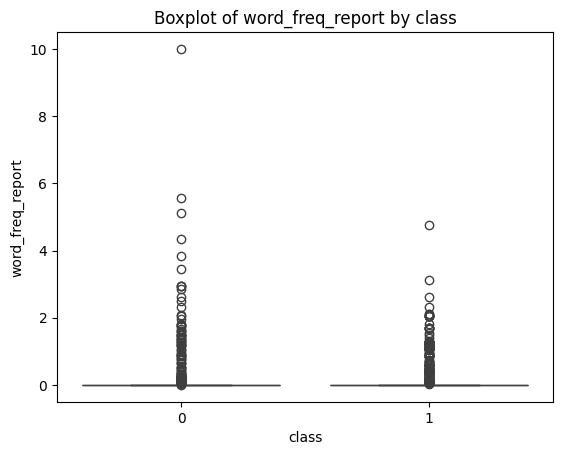

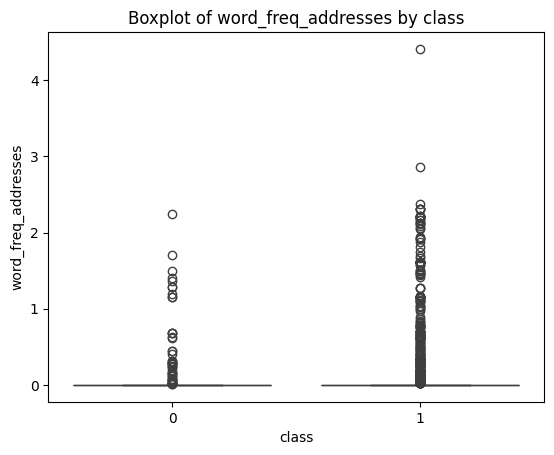

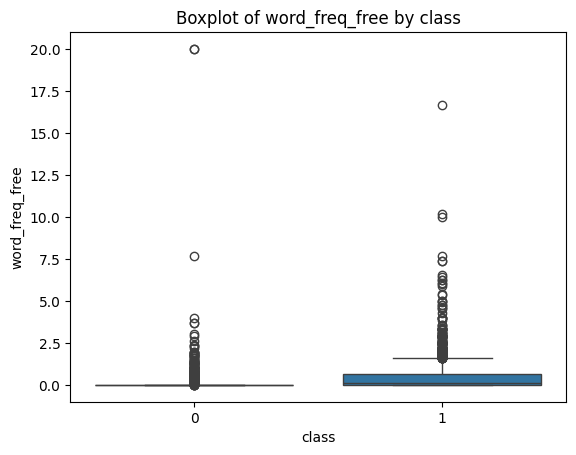

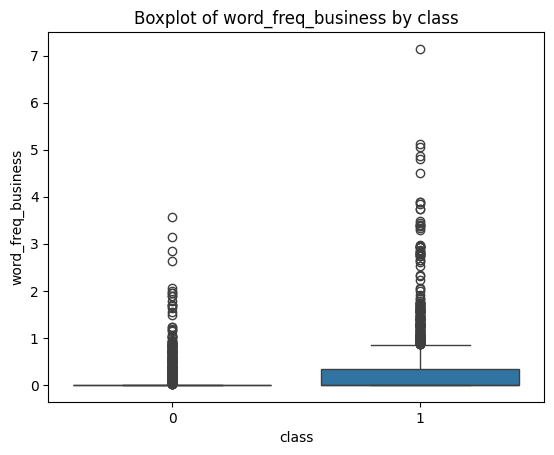

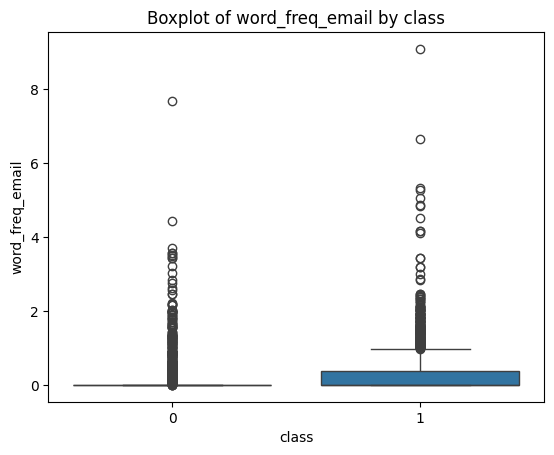

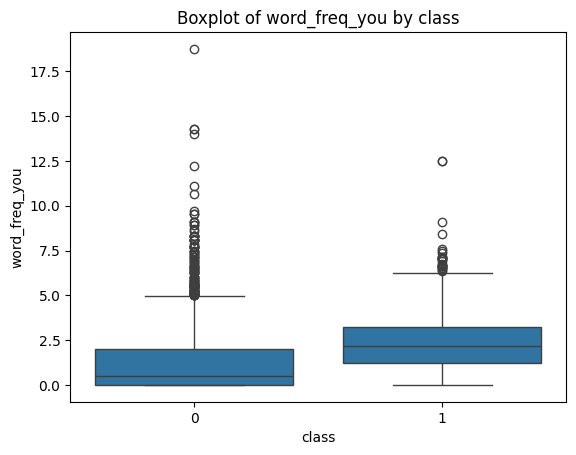

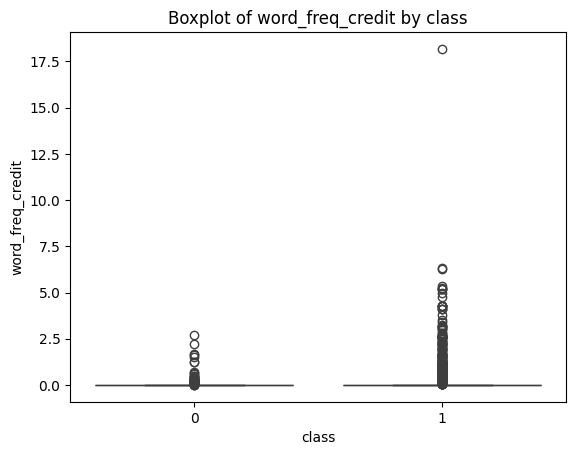

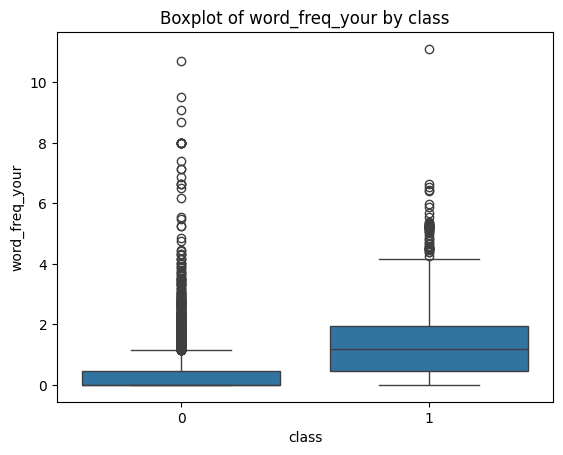

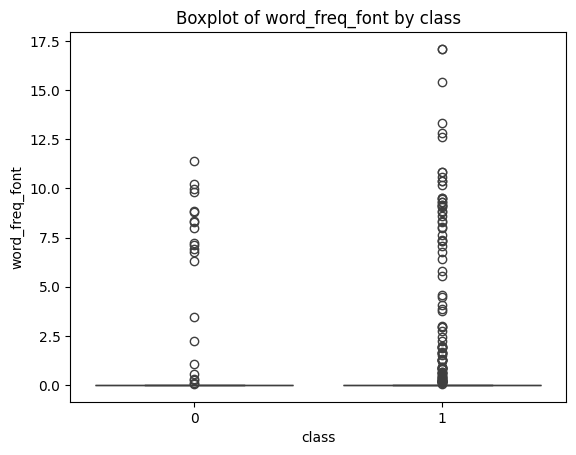

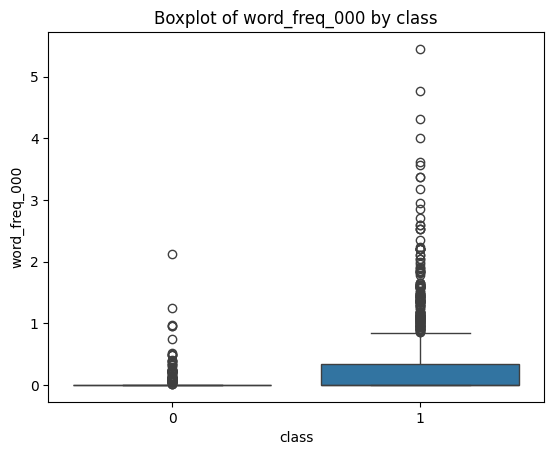

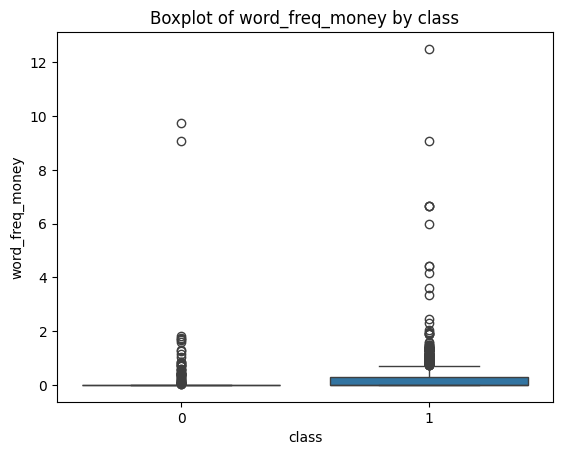

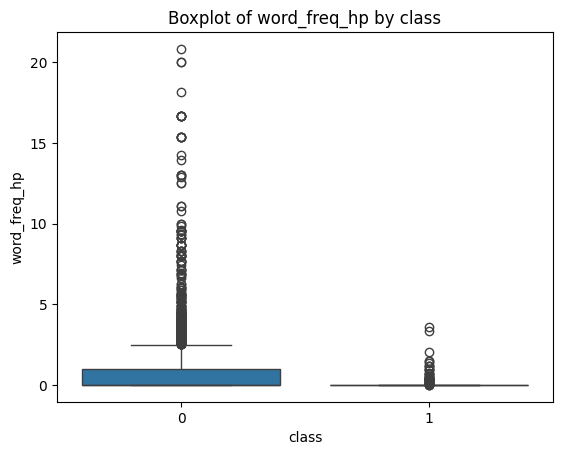

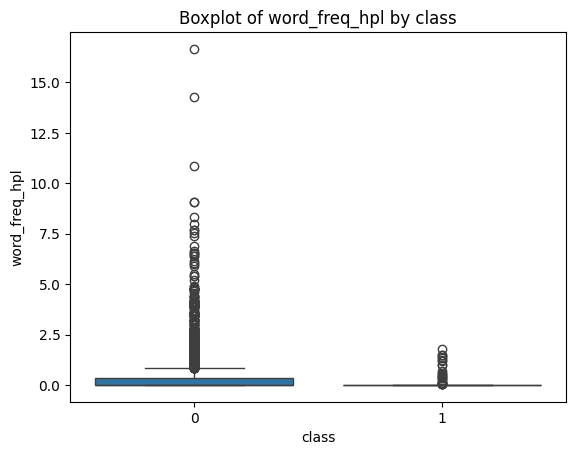

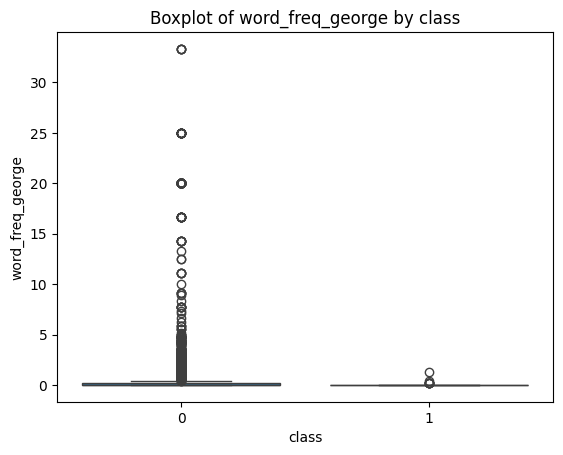

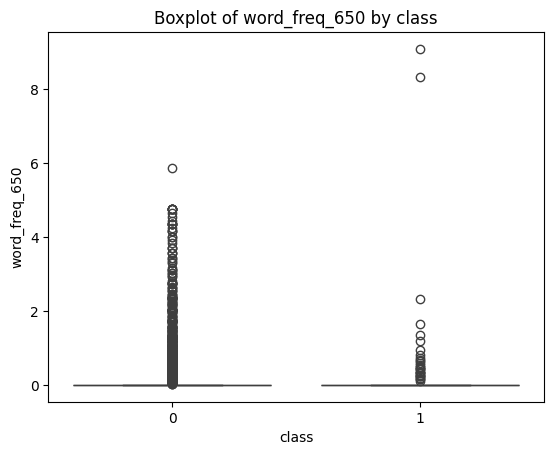

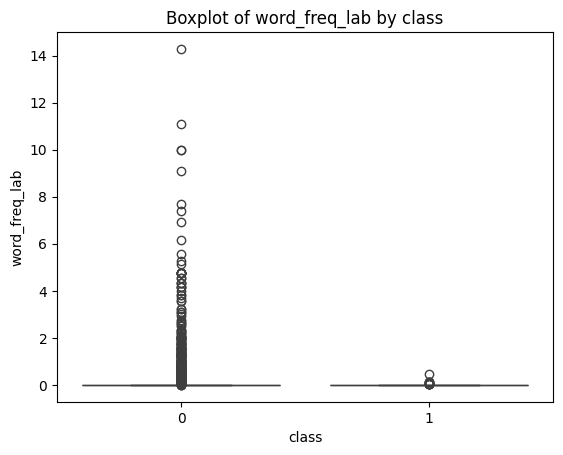

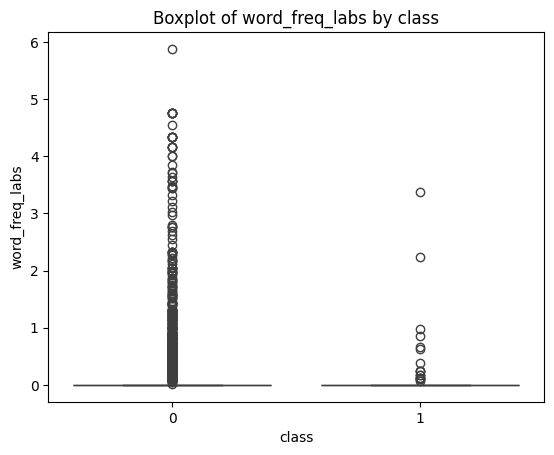

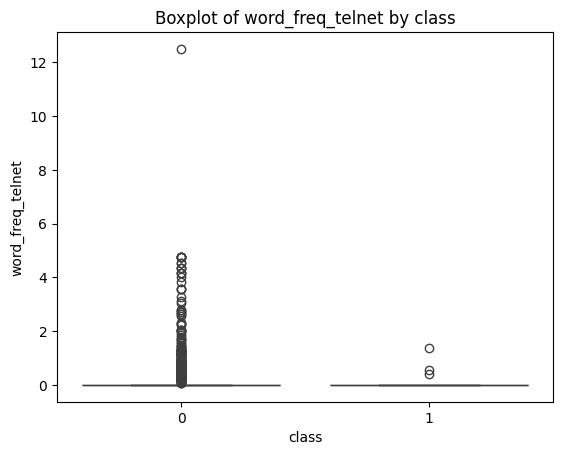

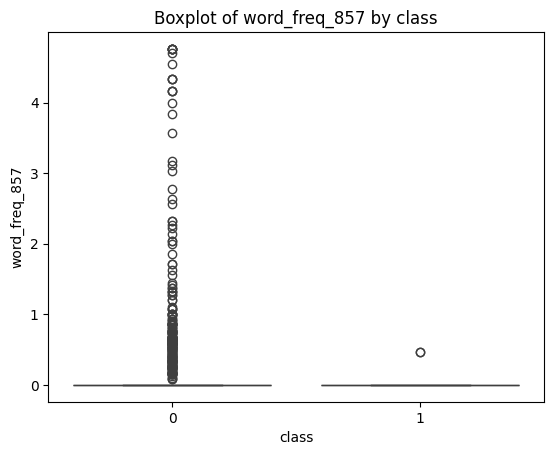

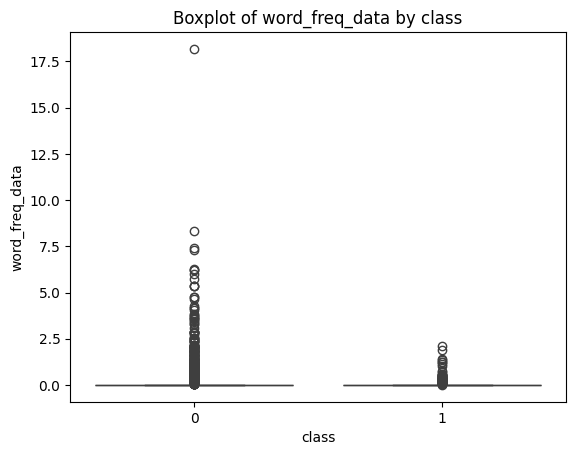

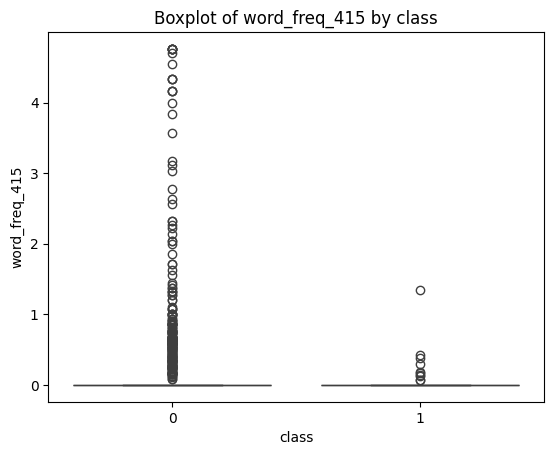

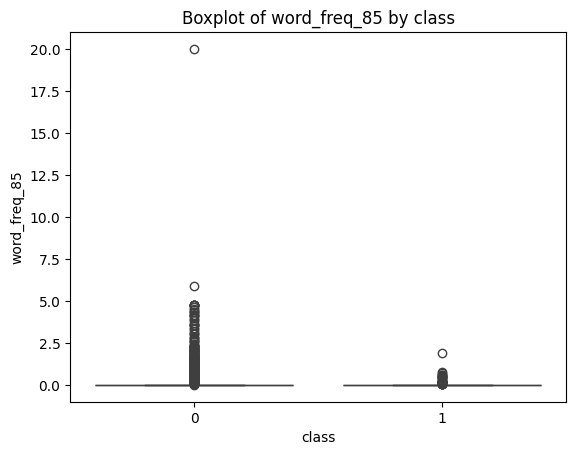

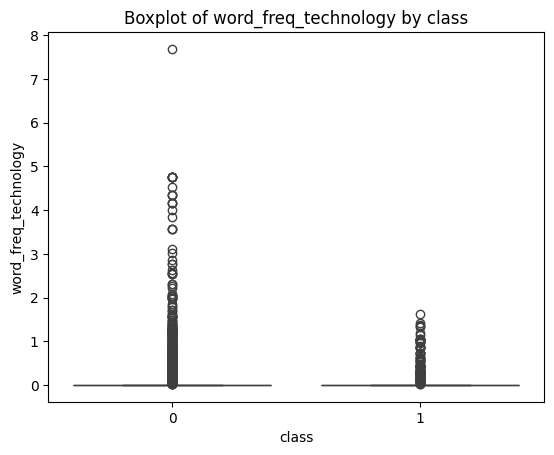

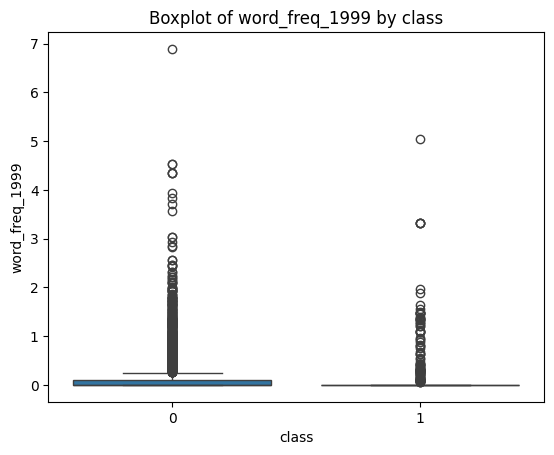

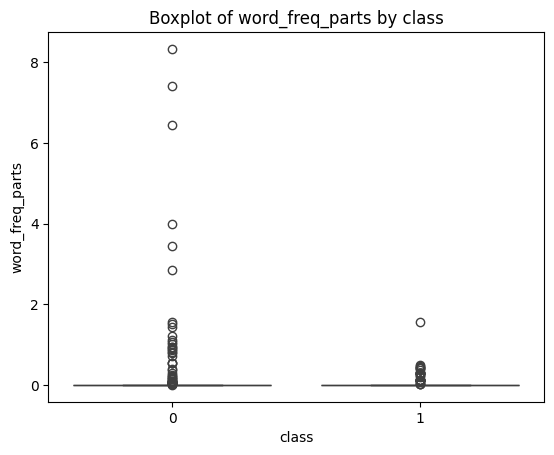

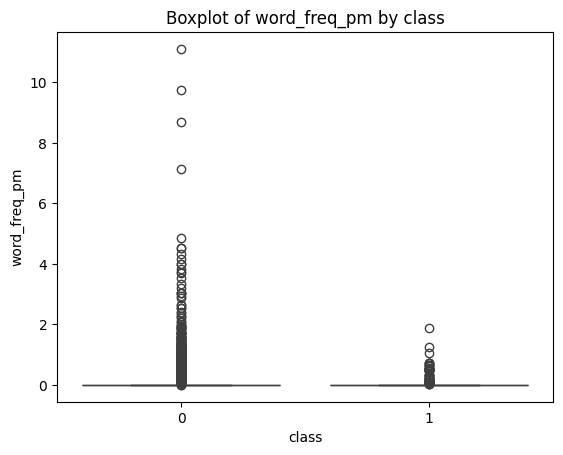

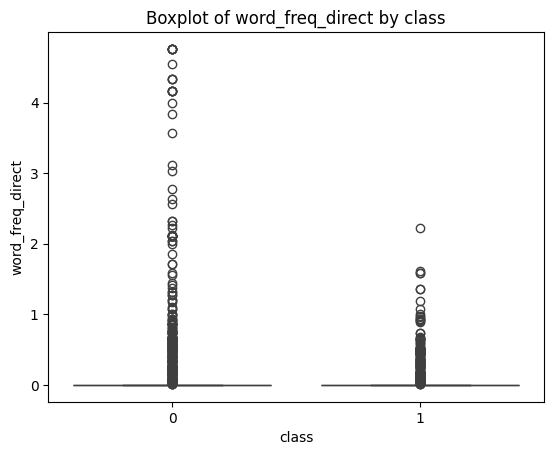

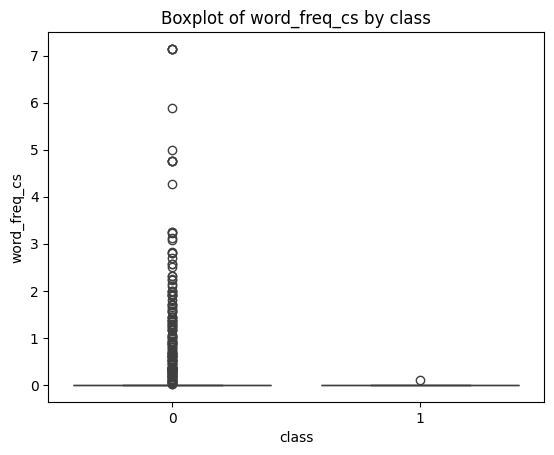

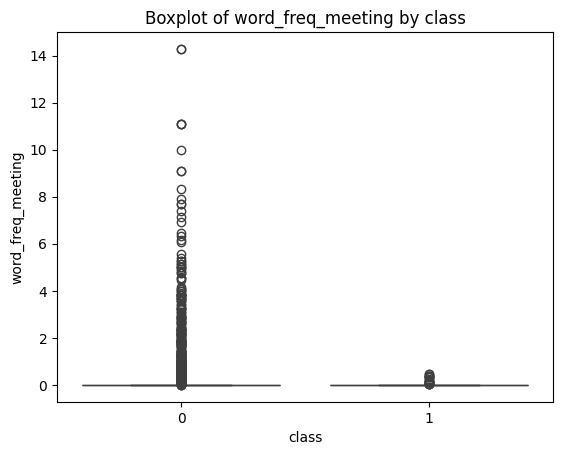

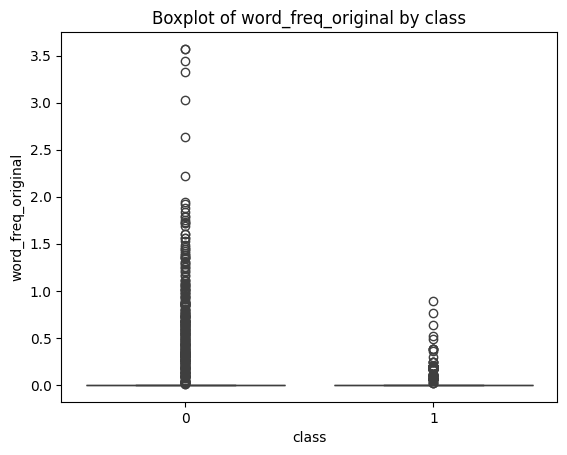

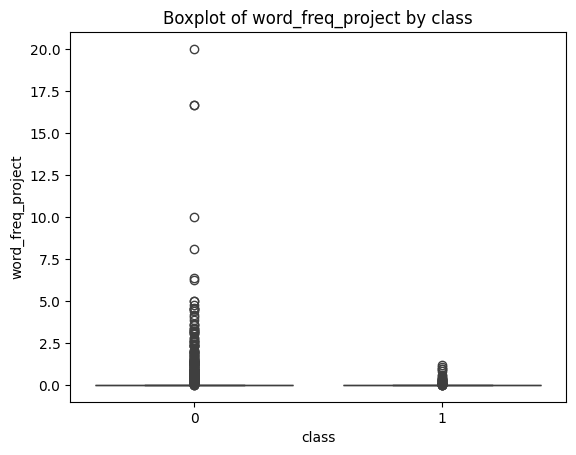

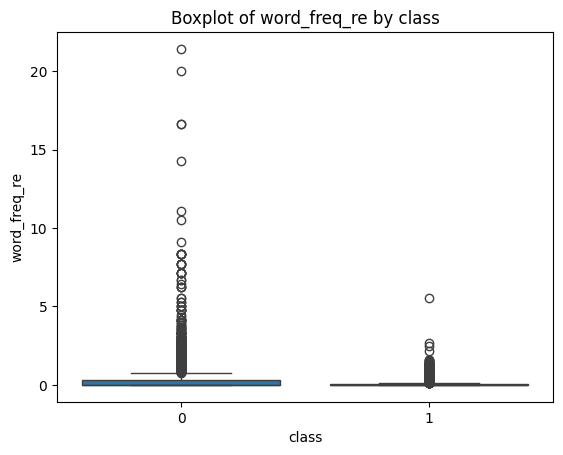

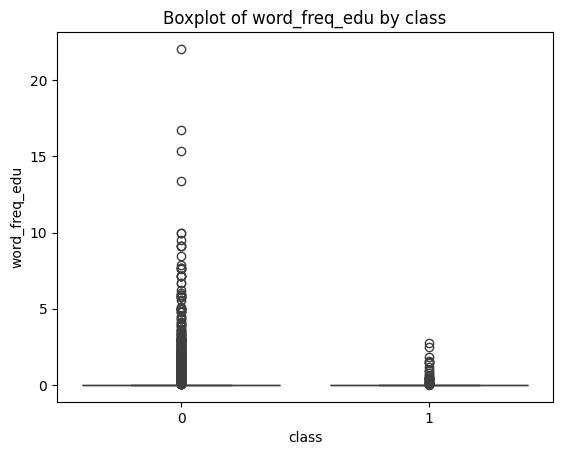

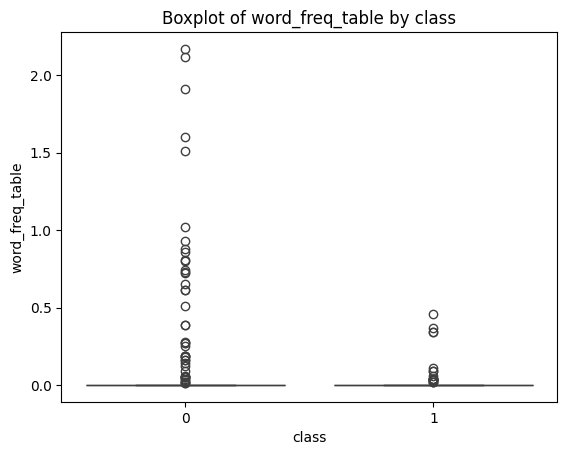

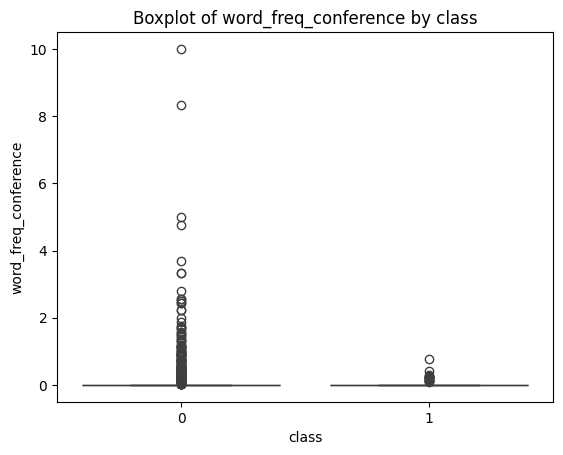

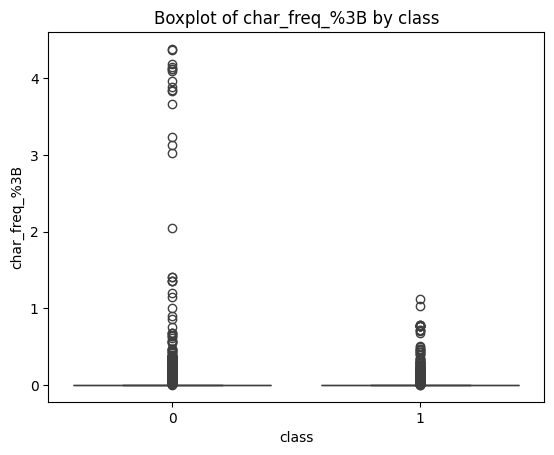

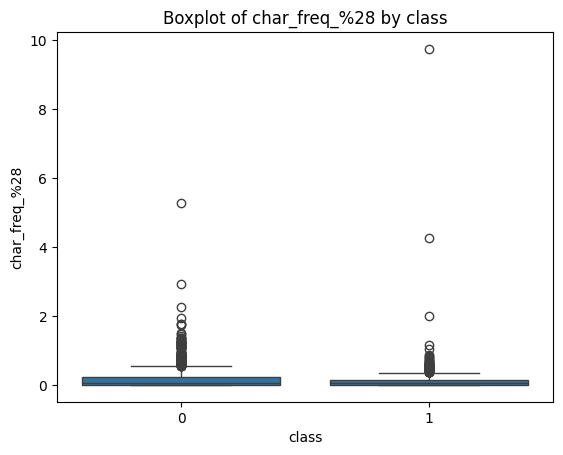

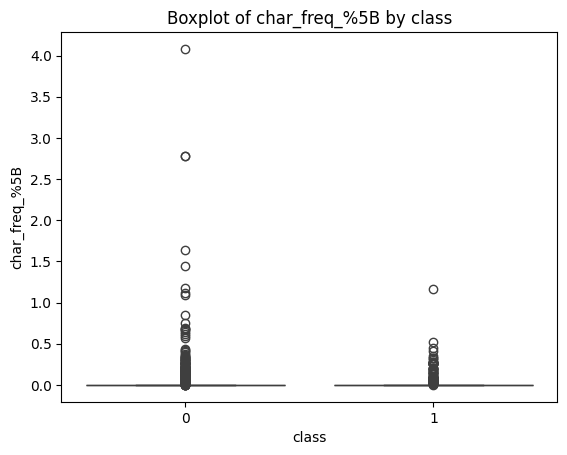

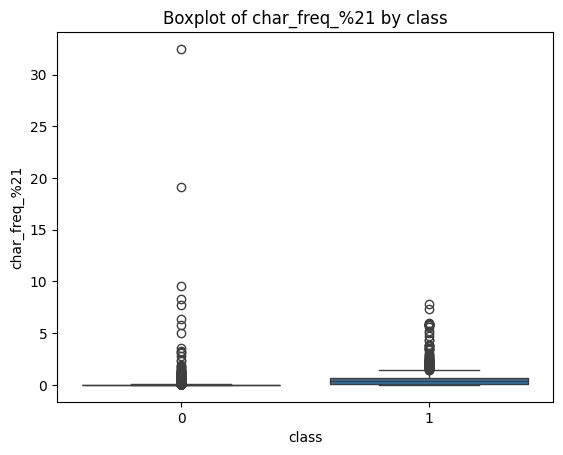

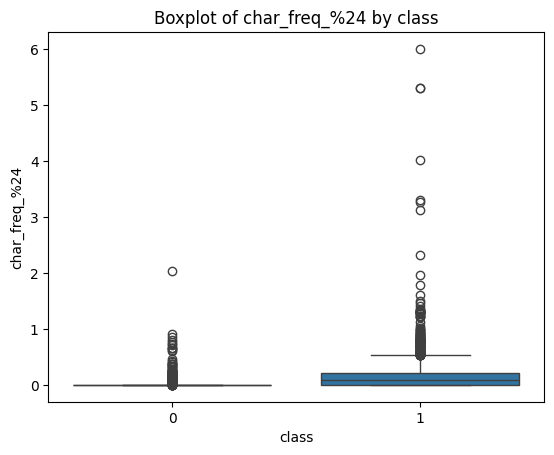

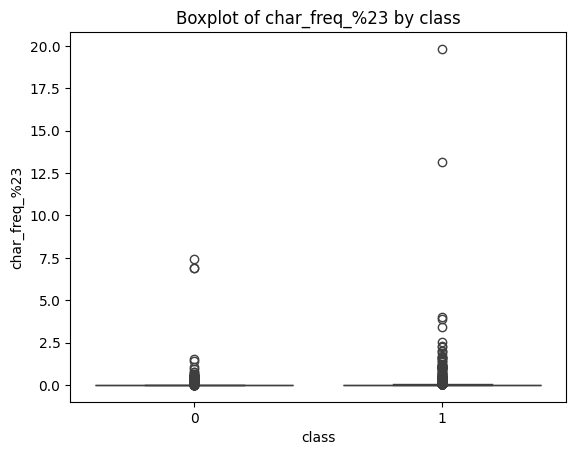

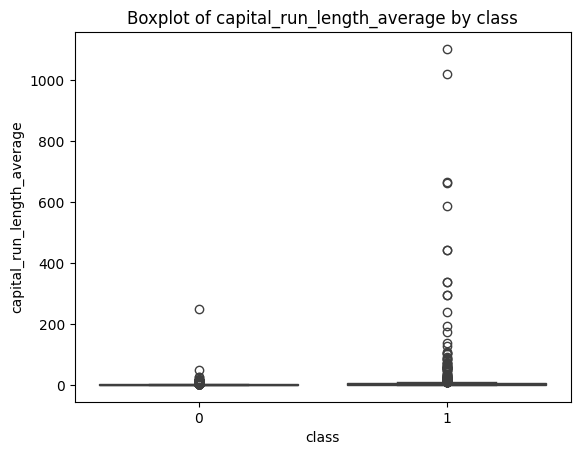

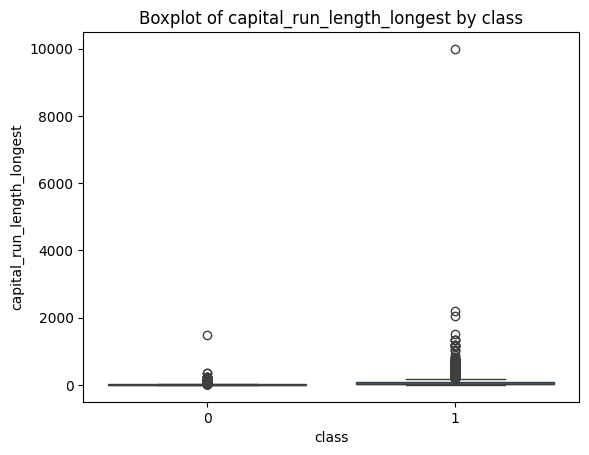

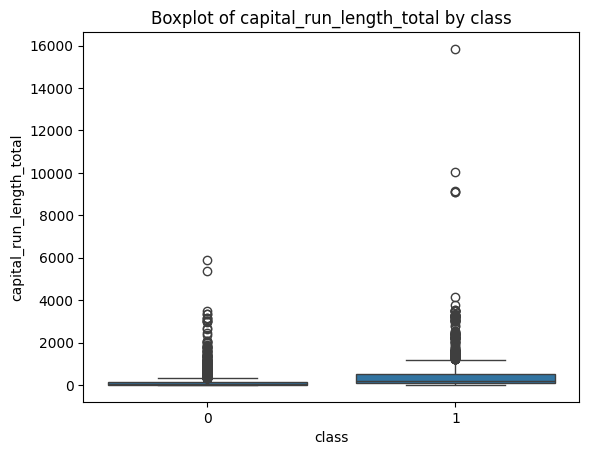

In [ ]:
for col in num_features:
    sns.boxplot(x=target_col, y=col, data=training_df)
    plt.title(f'Boxplot of {col} by {target_col}')
    plt.show()

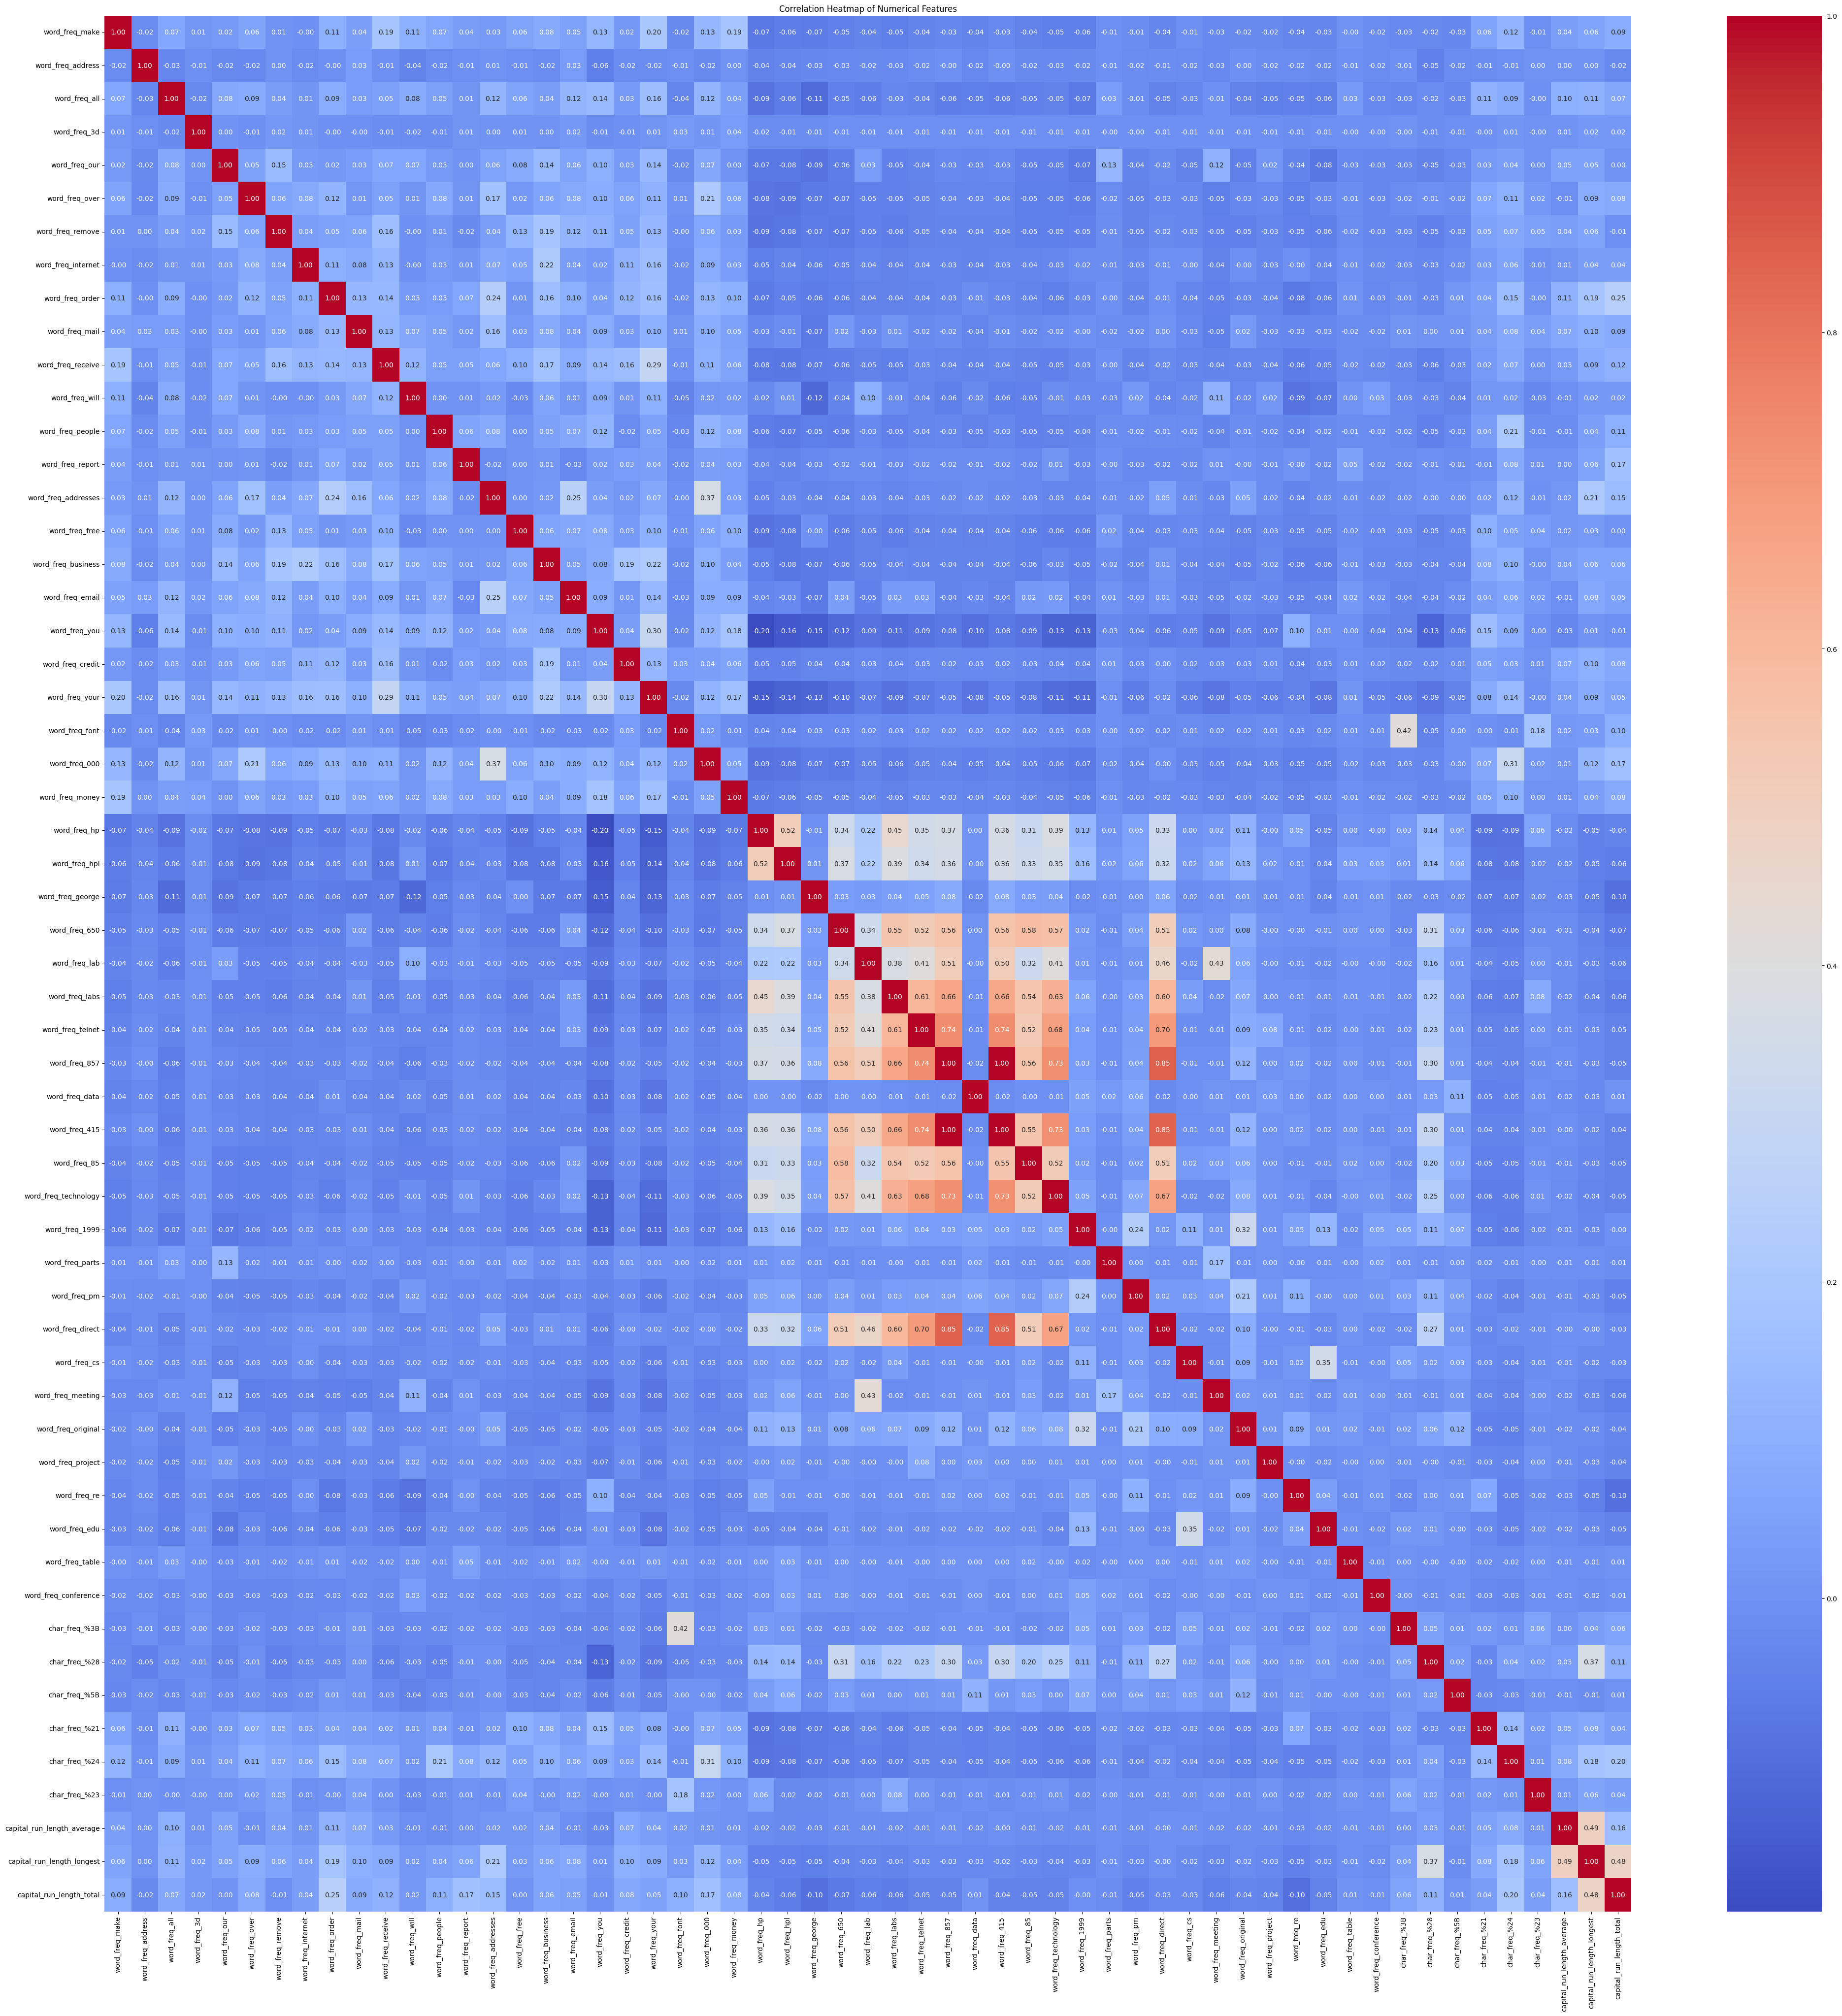

In [ ]:
plt.figure(figsize=(50,50))
corr = training_df[num_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### Categorical features

In [ ]:
cat_features = training_df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_features:
    sns.countplot(x=col, hue=target_col, data=training_df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Data Preprocessing

#### Removing lowly correlated columns

Selected features with correlation >= 0.2:
['word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_receive', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'char_freq_%21', 'char_freq_%24', 'capital_run_length_longest', 'capital_run_length_total', 'class']


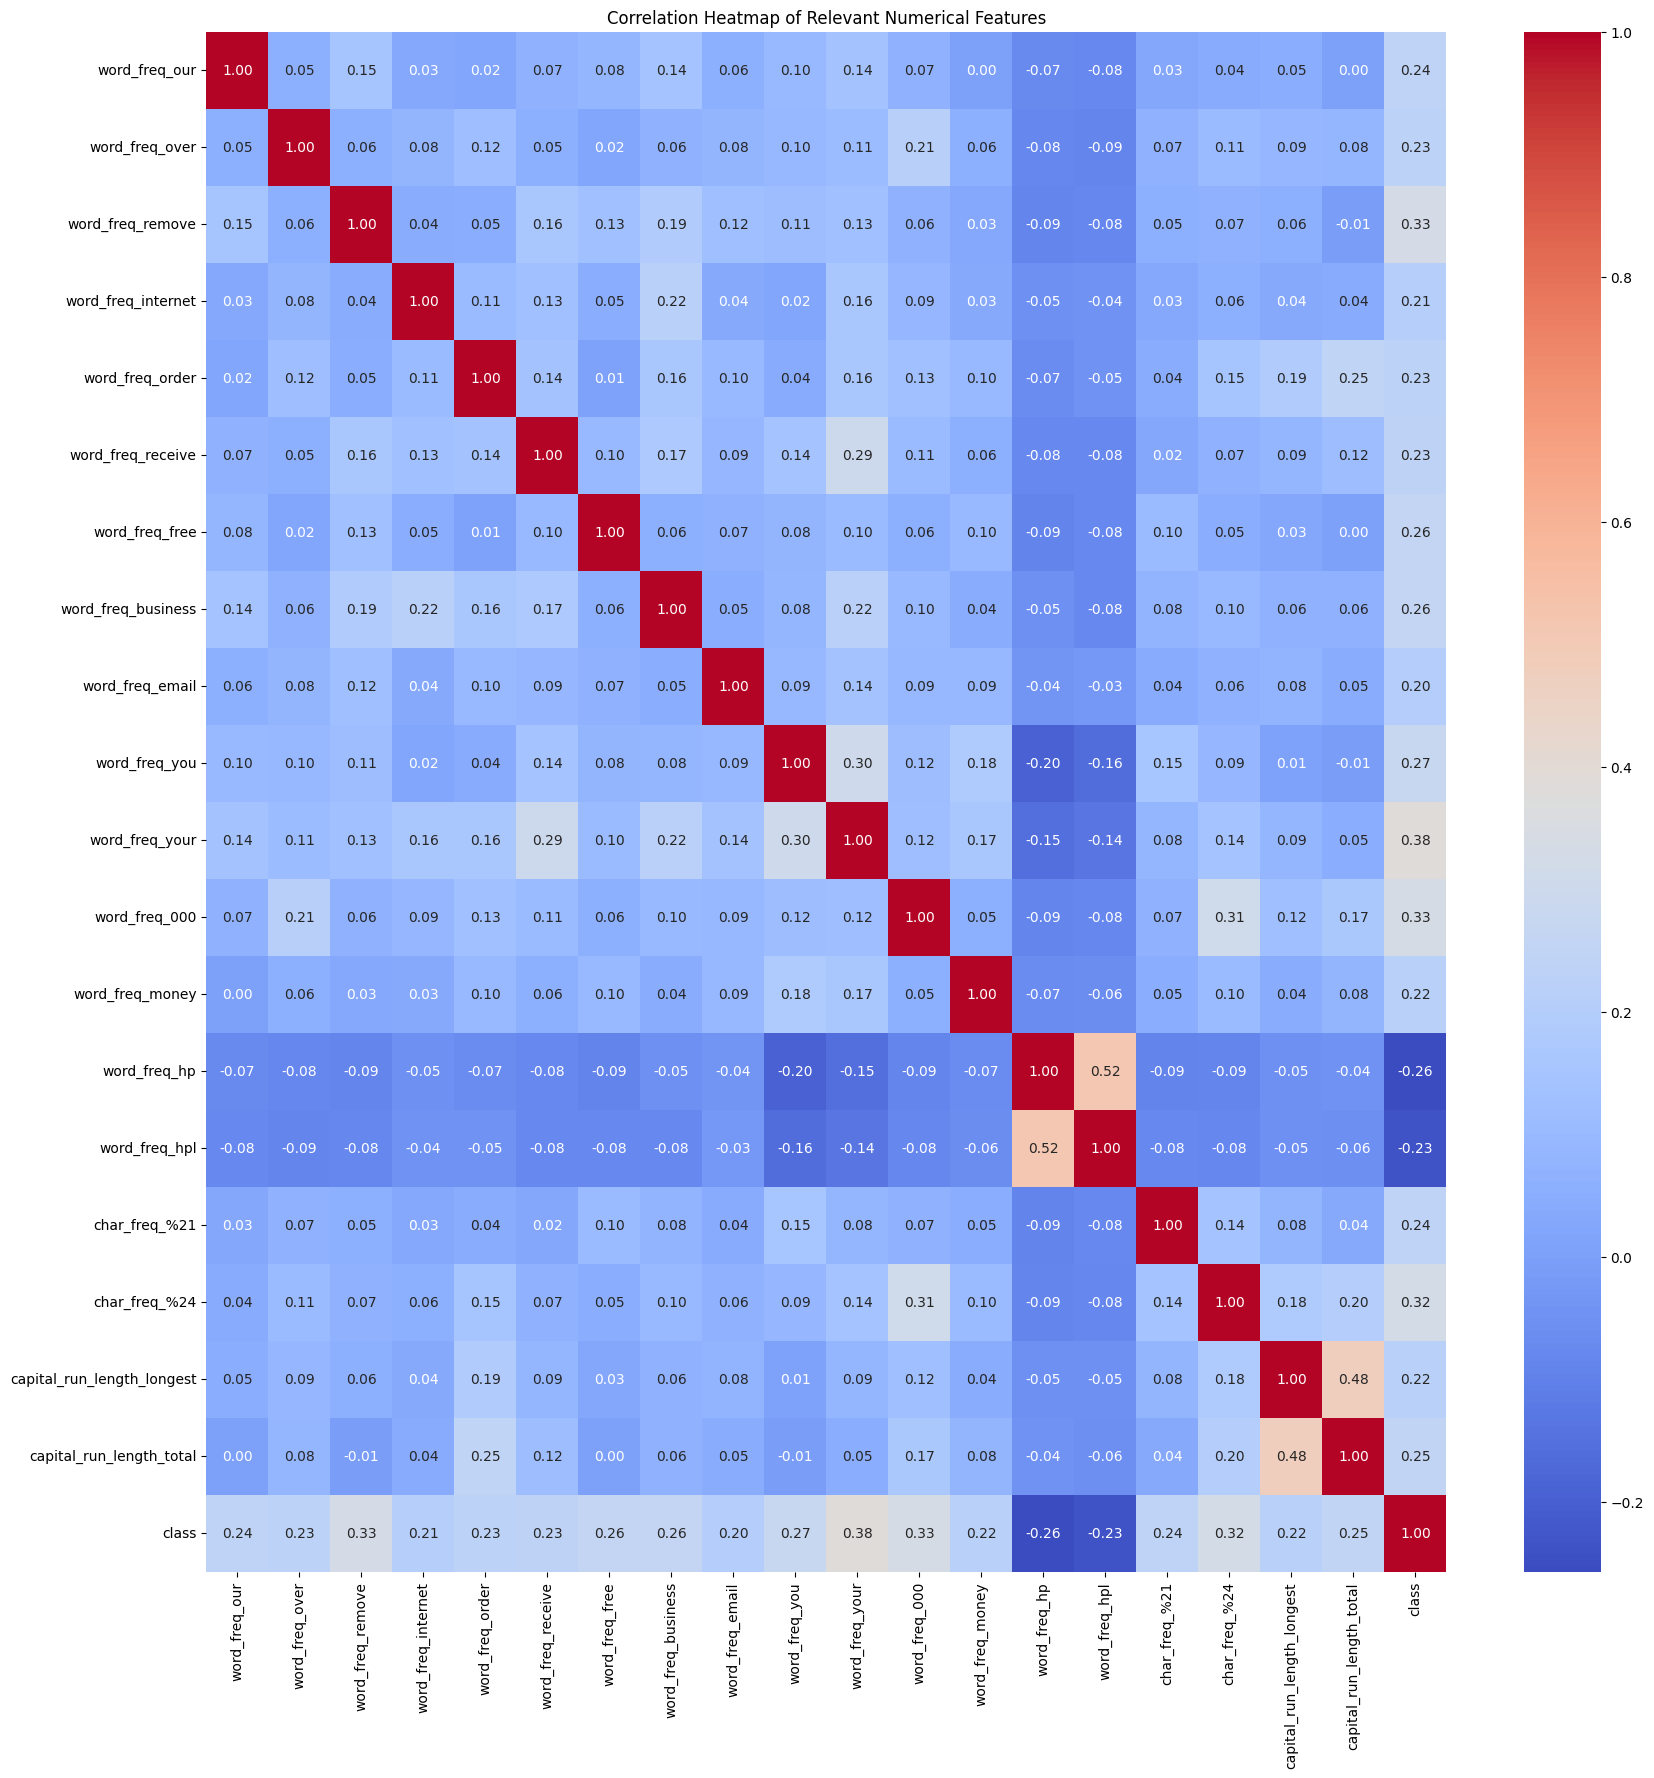

In [ ]:
target_corr = training_df[num_features + [target_col]].corr()[target_col].drop(target_col)
threshold = 0.2
relevant_features = target_corr[abs(target_corr) >= threshold].index.tolist()
relevant_features.append(target_col)
training_df=training_df[relevant_features]
print(f"Selected features with correlation >= {threshold}:")
print(relevant_features)
corr = training_df.corr()
plt.figure(figsize=(20,20))
# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Relevant Numerical Features')

plt.show()

#### Handling Missing Values

In [ ]:
for col in training_df.select_dtypes(include='object').columns:
    training_df[col]=training_df[col].fillna(training_df[col].mode()[0])

for col in training_df.select_dtypes(include=np.number).columns:
    training_df[col]=training_df[col].fillna(training_df[col].mean())




#### Encode categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for col in training_df.select_dtypes(include='object').columns:
    training_df[col] = label_enc.fit_transform(training_df[col])

#### Handling outliers




In [ ]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

num_features = training_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features = [col for col in num_features if col != target_col]
for col in num_features:
  outliers= detect_outliers_iqr(training_df[col])
  training_df.loc[outliers, col] = training_df[col].median()



#### Standardize

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

for col in features:
  if col in relevant_features:
    if features[col] == 1:
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()

    # Reshape the column data to 2D array
    training_df[col] = scaler.fit_transform(training_df[col].values.reshape(-1, 1))


## Modeling

#### Train , Test , Val Split

In [ ]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.svm import SVC
X = training_df.drop(columns=target_col)
y = training_df[target_col]

# Split into train+val (80%) and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Split temp into train (70% of total) and val (10% of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42
)
# Now: train=70%, val=10%, test=20%

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (3220, 19) (3220,)
Validation set: (460, 19) (460,)
Test set: (921, 19) (921,)


####  k-fold cross-validation

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_results = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    X_tr, X_val_k = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val_k = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = SVC(kernel='poly')
    model.fit(X_tr, y_tr)
    y_pred_k = model.predict(X_val_k)

    metrics = {
        "Fold": fold,
        "Accuracy": accuracy_score(y_val_k, y_pred_k),
        "Precision": precision_score(y_val_k, y_pred_k, average="weighted", zero_division=0),
        "Recall": recall_score(y_val_k, y_pred_k, average="weighted", zero_division=0),
        "F1": f1_score(y_val_k, y_pred_k, average="weighted", zero_division=0)
    }
    fold_results.append(metrics)

fold_df = pd.DataFrame(fold_results)
print("\nK-Fold Results:\n", fold_df)
print("\nAverage Metrics:\n", fold_df.mean(numeric_only=True))


K-Fold Results:
    Fold  Accuracy  Precision    Recall        F1
0     1  0.802795   0.807911  0.802795  0.793067
1     2  0.774845   0.792144  0.774845  0.761535
2     3  0.821429   0.828287  0.821429  0.811923
3     4  0.771739   0.781979  0.771739  0.758461
4     5  0.782609   0.796706  0.782609  0.769473

Average Metrics:
 Fold         3.000000
Accuracy     0.790683
Precision    0.801405
Recall       0.790683
F1           0.778892
dtype: float64


####  Hyperparameter Tuning on Validation Set

In [ ]:
# ------------------------------
# Faster Randomized Search for SVM (poly kernel)
# ------------------------------
random_param_dist = {
    'C': np.logspace(-3, 3, 30),       # Regularization (fewer points)
    'gamma': np.logspace(-4, 1, 30),   # gamma range
    'degree': [2, 3, 4]                # limit polynomial degrees
}

svm = SVC(kernel='poly')

rand_search = RandomizedSearchCV(
    svm, param_distributions=random_param_dist,
    n_iter=15, scoring='accuracy', cv=2,  # fewer iterations & folds
    random_state=42, n_jobs=-1
)
rand_search.fit(X_train, y_train)
best_rand_params = rand_search.best_params_
print("Best from Randomized Search (SVM):", best_rand_params)

# ------------------------------
# Narrow Grid Search around best params
# ------------------------------
C_range = np.logspace(
    np.log10(best_rand_params['C']) - 0.3,
    np.log10(best_rand_params['C']) + 0.3, 3
)
gamma_range = np.logspace(
    np.log10(best_rand_params['gamma']) - 0.3,
    np.log10(best_rand_params['gamma']) + 0.3, 3
)
degree_range = [best_rand_params['degree']]  # single best degree

grid_param_range = {
    'C': C_range,
    'gamma': gamma_range,
    'degree': degree_range
}

grid_search = GridSearchCV(
    svm, param_grid=grid_param_range,
    scoring='accuracy', cv=2, n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_svm_params = grid_search.best_params_
print("\nBest params after Grid Search:", best_svm_params)

# Final best params selection
best_params = (
    grid_search.best_params_
    if grid_search.best_score_ >= rand_search.best_score_
    else rand_search.best_params_
)
print("\nFinal Best Params:", best_params)

Best from Randomized Search (SVM): {'gamma': np.float64(0.4175318936560405), 'degree': 3, 'C': np.float64(239.5026619987486)}

Best params after Grid Search: {'C': np.float64(239.5026619987486), 'degree': 3, 'gamma': np.float64(0.4175318936560405)}

Final Best Params: {'C': np.float64(239.5026619987486), 'degree': 3, 'gamma': np.float64(0.4175318936560405)}


#### Final Model

In [ ]:
import time
final_model =SVC(kernel='poly',**best_params)
st=time.time()
final_model.fit(X_train, y_train)
et=time.time()
print(f"The training time is {et-st}")

The training time is 553.778401851654


## Evaluation and Visualization

In [ ]:
y_test_pred = final_model.predict(X_test)
print("\nFinal Test Set Performance:")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted', zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred, average='weighted', zero_division=0))
print("F1 Score :", f1_score(y_test, y_test_pred, average='weighted', zero_division=0))


Final Test Set Performance:
Accuracy : 0.7947882736156352
Precision: 0.8049072202279781
Recall   : 0.7947882736156352
F1 Score : 0.7878666487634476


<Figure size 800x500 with 0 Axes>

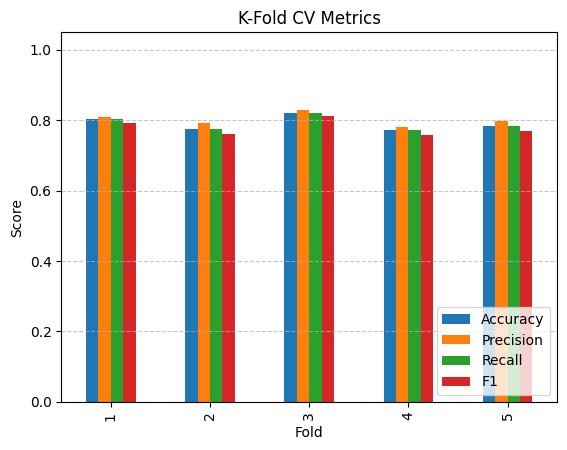

In [ ]:
plt.figure(figsize=(8, 5))
fold_df.set_index("Fold")[["Accuracy", "Precision", "Recall", "F1"]].plot(kind='bar')
plt.title("K-Fold CV Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
grid_results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(6, 4))
sns.heatmap(grid_results_df.pivot_table(values='mean_test_score', index='param_degree'),
            annot=True, fmt=".3f", cmap="Blues")
plt.title("Grid Search Accuracy")
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()